# Machine Learning Training 

Model Training for GEANT Dataset

In [1]:
# import required packages

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import logging
import h5py

logging.basicConfig(level=logging.WARN)
looger = logging.getLogger(__name__)

Download and load the GEANT dataset [Dataset](https://public-brian.geant.org/d/home/home?orgId=5&from=now-2y&to=now&inspect=6)

Save the file in Traffic-Dataset.csv

#### Load the dataset

In [2]:
dataframe = pd.read_csv('Traffic-Dataset.csv', usecols=[1])
dataset   = dataframe.values
dataset   = dataset.astype('float32')

In [3]:
tf.random.set_seed(7)

#### Feature Engineering

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [5]:
train = dataset[:,:]

#### Define Windowed Dataset

In [6]:
def windowed_dataset(data, window_size, batch_size, buffer):
  dataset = tf.data.Dataset.from_tensor_slices(data)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

#### Training Parameters

In [7]:
look_back = 1
iternations = 10
number_batch = 10

#### Create windowed dataset for training

In [9]:
train = windowed_dataset(dataset, look_back, iternations, len(dataset))

#### Train the model using LSTM 

In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, epochs=iternations, batch_size=number_batch, verbose=1)

Epoch 1/10
4378/4378 [==============================] - 11s 2ms/step - loss: 0.0041
Epoch 2/10
4378/4378 [==============================] - 9s 1ms/step - loss: 0.0013
Epoch 3/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013
Epoch 4/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013
Epoch 5/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013
Epoch 6/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013
Epoch 7/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013
Epoch 8/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013
Epoch 9/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013
Epoch 10/10
4378/4378 [==============================] - 8s 1ms/step - loss: 0.0013


#### Run the model prediction 

In [11]:
trainPrediction = model.predict(train)

4378/4378 [==============================] - 6s 793us/step


#### Prepare the data for prediction

In [ ]:
trainPrediction = scaler.inverse_transform(trainPrediction)
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPrediction)+look_back, :] = trainPrediction

#### Ploting the prediction

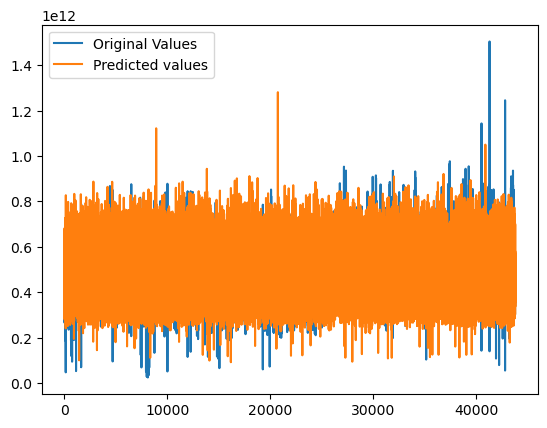

In [13]:
fig = plt.figure()
plt.plot(scaler.inverse_transform(dataset), label='Original Values')
plt.plot(trainPredictPlotion, label='Predicted values')
plt.legend()
plt.show()

#### Save the model

In [15]:
model.save("model.h5")